In [1]:


%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


plt.rcParams["agg.path.chunksize"]=10000
DelayFligths_df = pd.read_csv("DelayedFlights.csv", parse_dates= {"Data" : ["Year","Month","DayofMonth"]})

df=DelayFligths_df[["Data","DayOfWeek","UniqueCarrier","Origin","Dest","AirTime","Distance","ArrDelay","DepDelay","DepTime","ArrTime","CancellationCode"]]

df["ArrDelay"] = df['ArrDelay'].fillna(df['ArrDelay'].mean())

df["DepDelay"] = df['DepDelay'].fillna(df['DepDelay'].mean())

df["AirTime"] = df['AirTime'].fillna(df['AirTime'].mean())
df["Distance"] = df['Distance'].fillna(df['Distance'].mean())
#print ("Totals de null: " + str(df.isnull().sum().sum()))
df.dropna(inplace = True)

print(df.head())
msk = np.random.rand(len(df)) < 0.8

train = df[msk]

test = df[~msk]




#transformo les dades origen i destí
origin_cod = df[['Origin']]
desti_cod = df[['Dest']]


ordinal_encoder = OrdinalEncoder()
df["origin_enc"] = ordinal_encoder.fit_transform(origin_cod)

ordinal_encoder = OrdinalEncoder()
desti_cod_encoded = ordinal_encoder.fit_transform(desti_cod)

print(desti_cod_encoded[:10])

#escalo els valors de temps arribada i temps de soritda perquè quedin els valors entorn de 0 


min_max_scaler = MinMaxScaler()
deptime_values = df[['DepTime']]
scaled_values = min_max_scaler.fit(deptime_values)
df["deptime_esc"]=min_max_scaler.transform(deptime_values)

min_max_scaler = MinMaxScaler()
arrtime_values = df[['ArrTime']]
scaled_values = min_max_scaler.fit(arrtime_values)
df["arrtime_esc"]=min_max_scaler.transform(arrtime_values)


pd.get_dummies(df, columns=["CancellationCode"])


#torno a generar el train i test

msk = np.random.rand(len(df)) < 0.8

train = df[msk]

test = df[~msk]

#relació entre el retras de la sortida i des on surt (passat a numeric
X_train = train["origin_enc"].values

y_train = train["DepDelay"].values


X_test = test["origin_enc"].values

y_test = test["DepDelay"].values

# calcular polinomi
z = np.polyfit(X_train, y_train, 2)
f = np.poly1d(z)
print(f)

z = np.polyfit(X_test, y_test, 2)
f = np.poly1d(z)
print(f)

df_x = pd.DataFrame(np.c_[df['origin_enc']], columns = ['origin_enc'])
#Y axis = Our dependent variable or the income of adult i.e Income
df_y = pd.DataFrame(df.DepDelay)

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

regr = LinearRegression()
regr.fit(x_train, y_train)
print(regr.predict(x_train))



<ipython-input-1-4d9fb33513ca>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ArrDelay"] = df['ArrDelay'].fillna(df['ArrDelay'].mean())
<ipython-input-1-4d9fb33513ca>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DepDelay"] = df['DepDelay'].fillna(df['DepDelay'].mean())
<ipython-input-1-4d9fb33513ca>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

        Data  DayOfWeek UniqueCarrier Origin Dest  AirTime  Distance  \
0 2008-01-03          4            WN    IAD  TPA    116.0       810   
1 2008-01-03          4            WN    IAD  TPA    113.0       810   
2 2008-01-03          4            WN    IND  BWI     76.0       515   
3 2008-01-03          4            WN    IND  BWI     77.0       515   
4 2008-01-03          4            WN    IND  JAX     87.0       688   

   ArrDelay  DepDelay  DepTime  ArrTime CancellationCode  
0     -14.0       8.0   2003.0   2211.0                N  
1       2.0      19.0    754.0   1002.0                N  
2      14.0       8.0    628.0    804.0                N  
3      34.0      34.0   1829.0   1959.0                N  
4      11.0      25.0   1940.0   2121.0                N  


<ipython-input-1-4d9fb33513ca>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["origin_enc"] = ordinal_encoder.fit_transform(origin_cod)


[[284.]
 [284.]
 [ 48.]
 [ 48.]
 [149.]
 [155.]
 [177.]
 [177.]
 [179.]
 [220.]]


<ipython-input-1-4d9fb33513ca>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["deptime_esc"]=min_max_scaler.transform(deptime_values)
<ipython-input-1-4d9fb33513ca>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["arrtime_esc"]=min_max_scaler.transform(arrtime_values)


           2
-5.11e-05 x + 0.0213 x + 41.41
            2
-6.308e-05 x + 0.02614 x + 40.99
[[42.4246406 ]
 [42.65391549]
 [42.34582736]
 ...
 [43.50653147]
 [43.58534472]
 [43.47787211]]


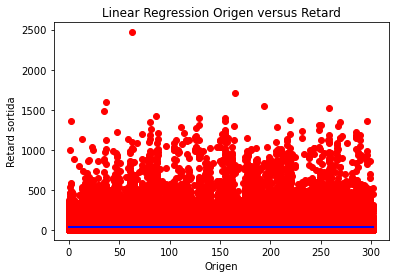

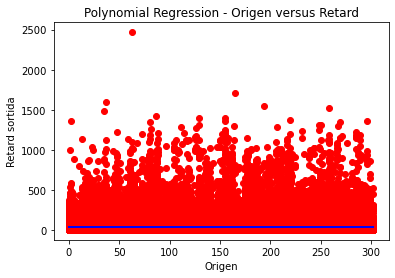

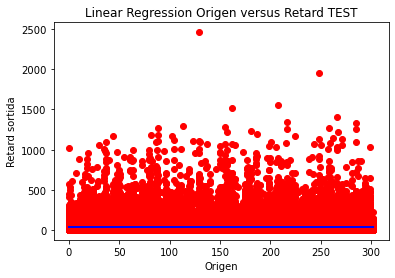

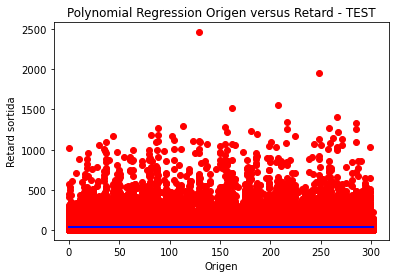

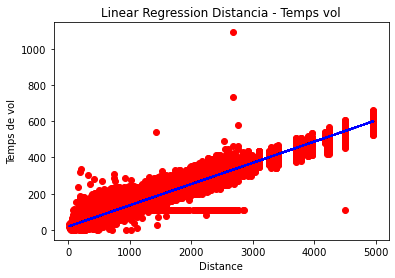

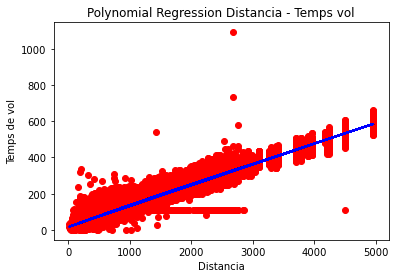

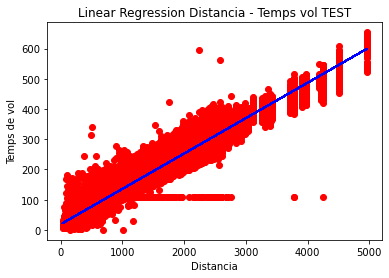

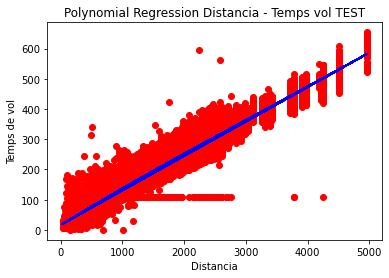

In [2]:
## Exercici 3
## Resumeix les noves columnes generades de manera estadística i gràfica

df_x = pd.DataFrame(np.c_[df['origin_enc']], columns = ['origin_enc'])
#Y axis = Our dependent variable or the income of adult i.e Income
df_y = pd.DataFrame(df.DepDelay)

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

#analisis dades train
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
#print(regr.predict(x_train))


from sklearn.preprocessing import PolynomialFeatures
poly_reg =  PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)


plt.scatter(x_train , y_train, color = 'red')
plt.plot(x_train , lin_reg.predict(x_train), color = 'blue')
plt.title("Linear Regression Origen versus Retard")
plt.xlabel("Origen")
plt.ylabel("Retard sortida")
plt.show()



plt.scatter(x_train , y_train, color = 'red')
plt.plot(x_train , lin_reg_2.predict( poly_reg.fit_transform(x_train)), color = 'blue')
plt.title("Polynomial Regression - Origen versus Retard")
plt.xlabel("Origen")
plt.ylabel("Retard sortida")
plt.show()



#analisis dades test
lin_reg = LinearRegression()
lin_reg.fit(x_test, y_test)
#print(regr.predict(x_train))


from sklearn.preprocessing import PolynomialFeatures
poly_reg =  PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x_test)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_test)


plt.scatter(x_test , y_test, color = 'red')
plt.plot(x_test , lin_reg.predict(x_test), color = 'blue')
plt.title("Linear Regression Origen versus Retard TEST")
plt.xlabel("Origen")
plt.ylabel("Retard sortida")
plt.show()



plt.scatter(x_test , y_test, color = 'red')
plt.plot(x_test , lin_reg_2.predict( poly_reg.fit_transform(x_test)), color = 'blue')
plt.title("Polynomial Regression Origen versus Retard - TEST")
plt.xlabel("Origen")
plt.ylabel("Retard sortida")
plt.show()

# EL RESULTAT DAQUEST EXERCICI VEIEM QUE HI HA POCA realació entre ORIGEN i retard darribada

#per poder comprar el resultats estudiaré les variables AirTime i Distance
#
df2_x = pd.DataFrame(np.c_[df['Distance']], columns = ['Distance'])
#Y axis = Our dependent variable or the income of adult i.e Income
df2_y = pd.DataFrame(df.AirTime)

x2_train, x2_test, y2_train, y2_test = train_test_split(df2_x, df2_y, test_size=0.33, random_state=42)

#analisis dades train
lin2_reg = LinearRegression()
lin2_reg.fit(x2_train, y2_train)
#print(regr.predict(x_train))



poly2_reg =  PolynomialFeatures(degree = 4)
X2_poly = poly2_reg.fit_transform(x2_train)
lin2_reg_2 = LinearRegression()
lin2_reg_2.fit(X2_poly, y2_train)


plt.scatter(x2_train , y2_train, color = 'red')
plt.plot(x2_train , lin2_reg.predict(x2_train), color = 'blue')
plt.title("Linear Regression Distancia - Temps vol")
plt.xlabel("Distance")
plt.ylabel("Temps de vol")
plt.show()



plt.scatter(x2_train , y2_train, color = 'red')
plt.plot(x2_train , lin2_reg_2.predict( poly2_reg.fit_transform(x2_train)), color = 'blue')
plt.title("Polynomial Regression Distancia - Temps vol")
plt.xlabel("Distancia")
plt.ylabel("Temps de vol")
plt.show()



#analisis dades test
lin2_reg = LinearRegression()
lin2_reg.fit(x2_test, y2_test)
#print(regr.predict(x_train))


from sklearn.preprocessing import PolynomialFeatures
poly2_reg =  PolynomialFeatures(degree = 4)
X2_poly = poly2_reg.fit_transform(x2_test)
lin2_reg_2 = LinearRegression()
lin2_reg_2.fit(X2_poly, y2_test)


plt.scatter(x2_test , y2_test, color = 'red')
plt.plot(x2_test , lin2_reg.predict(x2_test), color = 'blue')
plt.title("Linear Regression Distancia - Temps vol TEST")
plt.xlabel("Distancia")
plt.ylabel("Temps de vol")
plt.show()



plt.scatter(x2_test , y2_test, color = 'red')
plt.plot(x2_test , lin2_reg_2.predict( poly2_reg.fit_transform(x2_test)), color = 'blue')
plt.title("Polynomial Regression Distancia - Temps vol TEST")
plt.xlabel("Distancia")
plt.ylabel("Temps de vol")
plt.show()
